In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading data file
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Checking few samples to understand to understand data better
data.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q


In [5]:
#Chacking shape of data
data.shape

(891, 12)

In [6]:
#Chacking data type and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Observations-
#Columns Name, Sex,Ticket, Cabin and Embarked have object type data.
#Columns Age, Cabin and Embarked have null values

In [7]:
#Checking for exact null vales
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
#Observations
#1.There are 891 passengers in our dataset. Columns Age, Cabin and Embarked have null values.
#2. The Age feature is missing approximately 19.8% of its values. We are assuming that Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
#3.The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
#4.The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [9]:
#Treating null values
data['Age']=data['Age'].fillna(data['Age'].mean())


In [10]:
data['Age'].isna().sum()

0

In [11]:
data.drop('Cabin',axis=1, inplace=True)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#All null values have been fixed now. 

In [15]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [ ]:
#Let's use data vizualization to see the relationship between features and label




Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


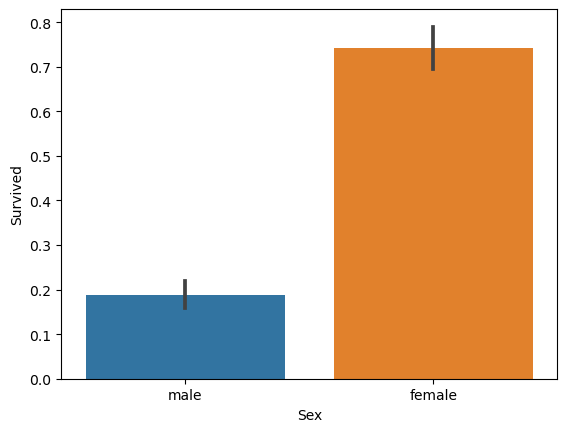

In [16]:
#Checking how many males and females survivded-
sns.barplot(x="Sex", y="Survived", data=data)


print("Percentage of females who survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)




In [ ]:
#Graph shows that females have higher chance of survival.

Percentage of Pclass 1 who survived: 62.96296296296296
Percentage of Pclass 2 who survived: 47.28260869565217
Percentage of Pclass 3 who survived: 24.236252545824847


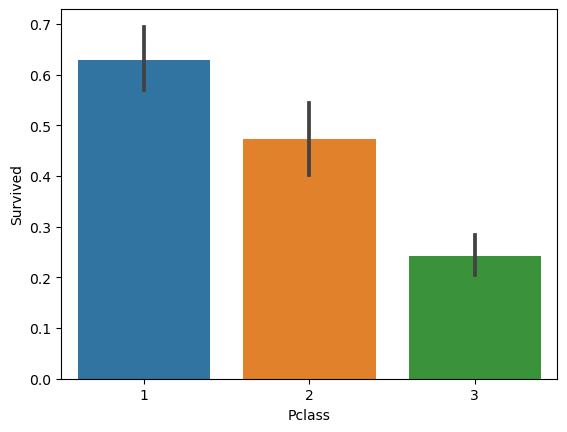

In [17]:
#Checking Pclass survival-
sns.barplot(x="Pclass", y="Survived", data=data)

#print percentage of people by Pclass that survived
print("Percentage of Pclass 1 who survived:", data["Survived"][data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass 2 who survived:", data["Survived"][data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass 3 who survived:", data["Survived"][data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [ ]:
#Passengers of P1 and P2 class(with higher socioeconomic class) have higher class of survival than passengers of P3 class.

In [18]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Percentage of SibSp 0 who survived: 34.53947368421053
Percentage of SibSp 1 who survived: 53.588516746411486
Percentage of SibSp 2 who survived: 46.42857142857143
Percentage of SibSp 3 who survived: 25.0
Percentage of SibSp 4 who survived: 16.666666666666664


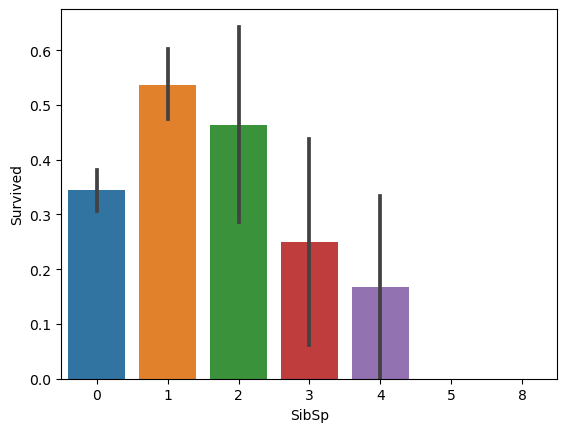

In [19]:
#Checking SibSp v/s survival
sns.barplot(x="SibSp", y="Survived", data=data)

print("Percentage of SibSp 0 who survived:", data["Survived"][data["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp 1 who survived:", data["Survived"][data["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp 2 who survived:", data["Survived"][data["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp 3 who survived:", data["Survived"][data["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp 4 who survived:", data["Survived"][data["SibSp"] == 4].value_counts(normalize = True)[1]*100)



In [ ]:
#We can conclude that people with more siblings or spouses are less likely to survive whereas people with 0,1,2 siblings/spouses have higher chance of survival.

In [20]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

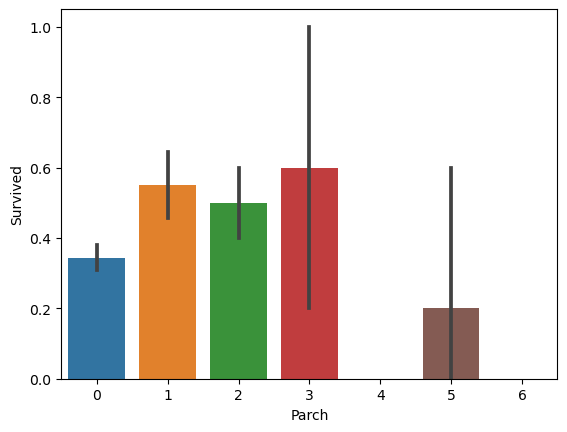

In [21]:
#Checking Parch v/s Survived
sns.barplot(x="Parch", y="Survived", data=data)
plt.show()

In [ ]:
#We can understand that people with less than four parents or children aboard have higher chances of survival than those
#with four or more. 

In [22]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

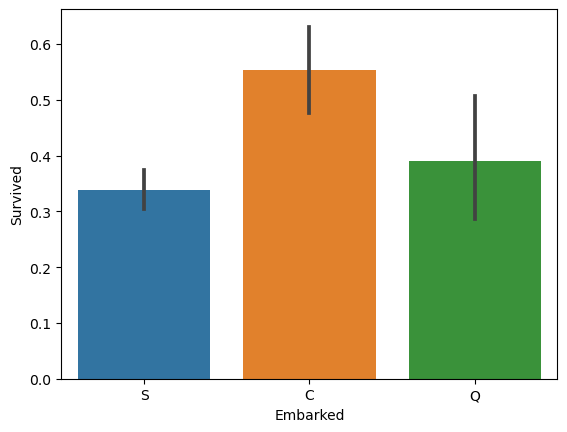

In [23]:
#Checking Embarked v/s survival
sns.barplot(x="Embarked", y="Survived", data=data)
plt.show()

In [ ]:
# We can see that passengers embarked from C port have higher chance of survival than S and Q.

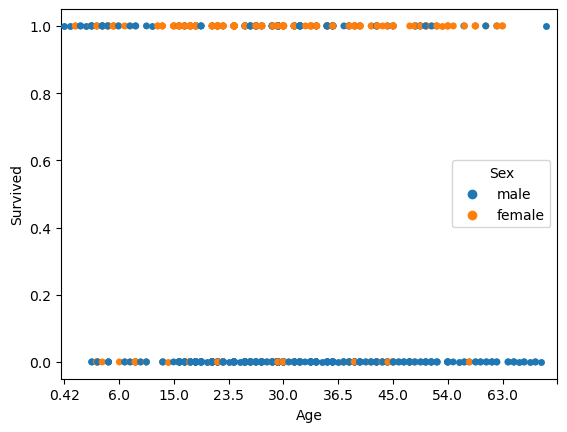

In [24]:
#Checking Age v/s Survival
sns.stripplot(x='Age',y='Survived',data=data, hue='Sex')
plt.xticks(range(0,100,10))
plt.show()


In [ ]:
#We can see that passengers whose age us less than 15 are more likely to survive. Also, non-survival rates above 15 years
#is higher in males.

In [25]:
#We can now drop the Ticket and name feature since they are unlikely to yield any useful information.

data.drop('Ticket',axis=1,inplace=True)


In [26]:
data.drop('Name',axis=1,inplace=True)



In [27]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [29]:
# Let's convert object type data columns into integers
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [32]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [35]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [38]:
#Clearly SibSp, Parch, Fare have high skewness
data['SibSp']=np.cbrt(data['SibSp'])
data['Parch']=np.cbrt(data['Parch'])
data['Fare']=np.cbrt(data['Fare'])

In [39]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          1.033059
Parch          1.348334
Fare           1.230382
Embarked      -1.264823
dtype: float64

In [ ]:
#This has fixed the skewness for all the features that seemed problematic


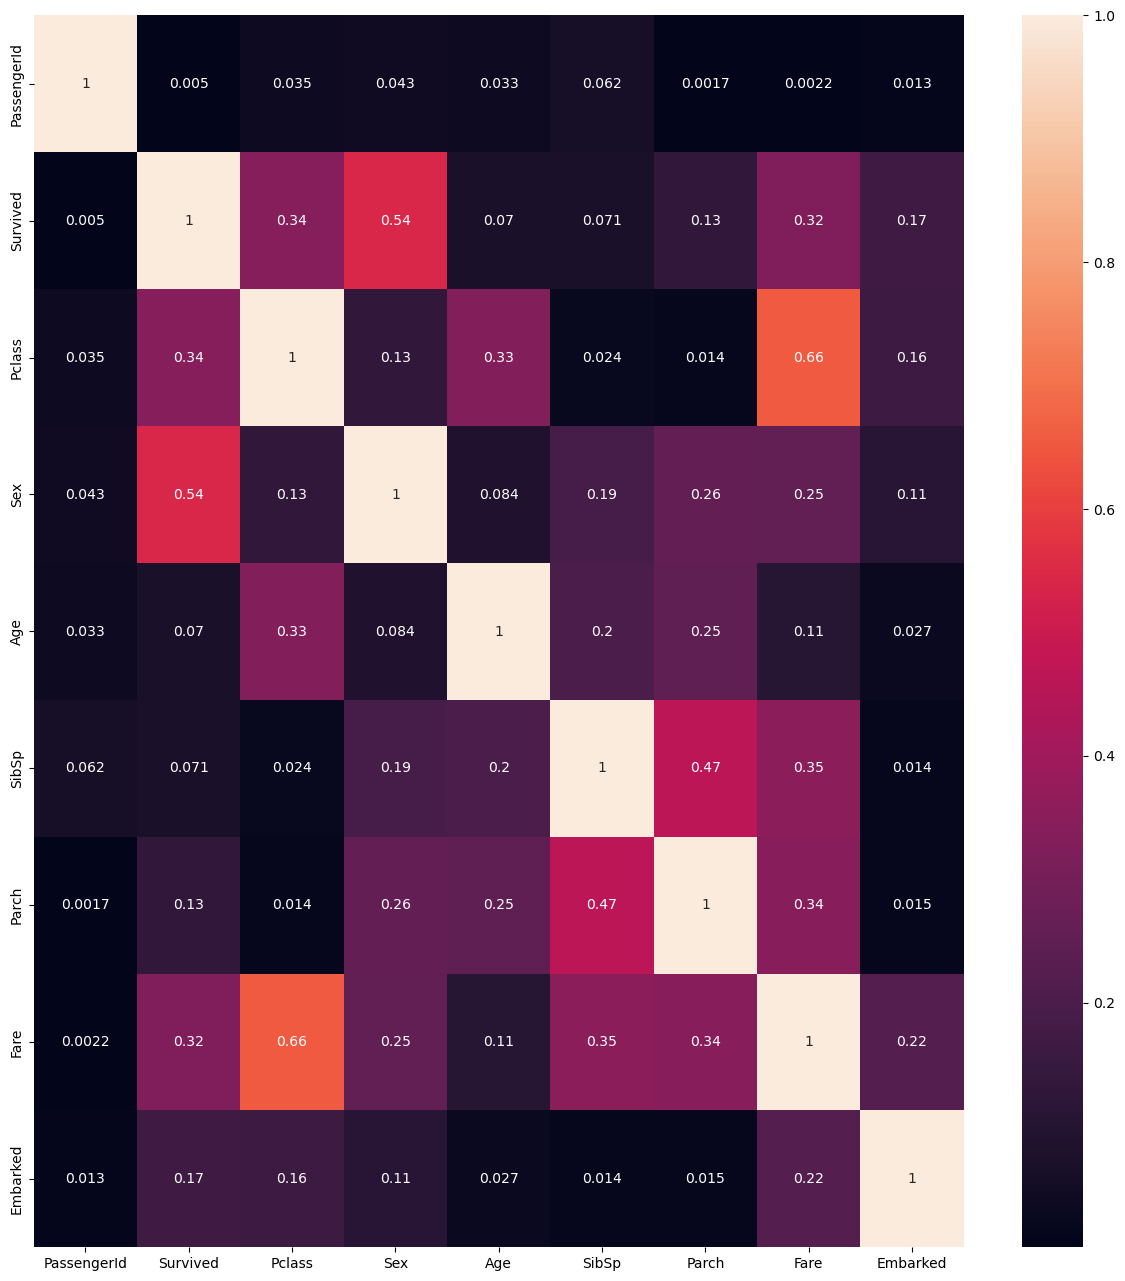

In [40]:
#Plotting heatmap to check for corelation between features-
df_corr= data.corr().abs()
plt.figure(figsize=(15,16))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()

In [ ]:
#There doesn't seem much correlation between features that can seem to be an issue.

<Axes: title={'center': 'Correlation with Survived'}>

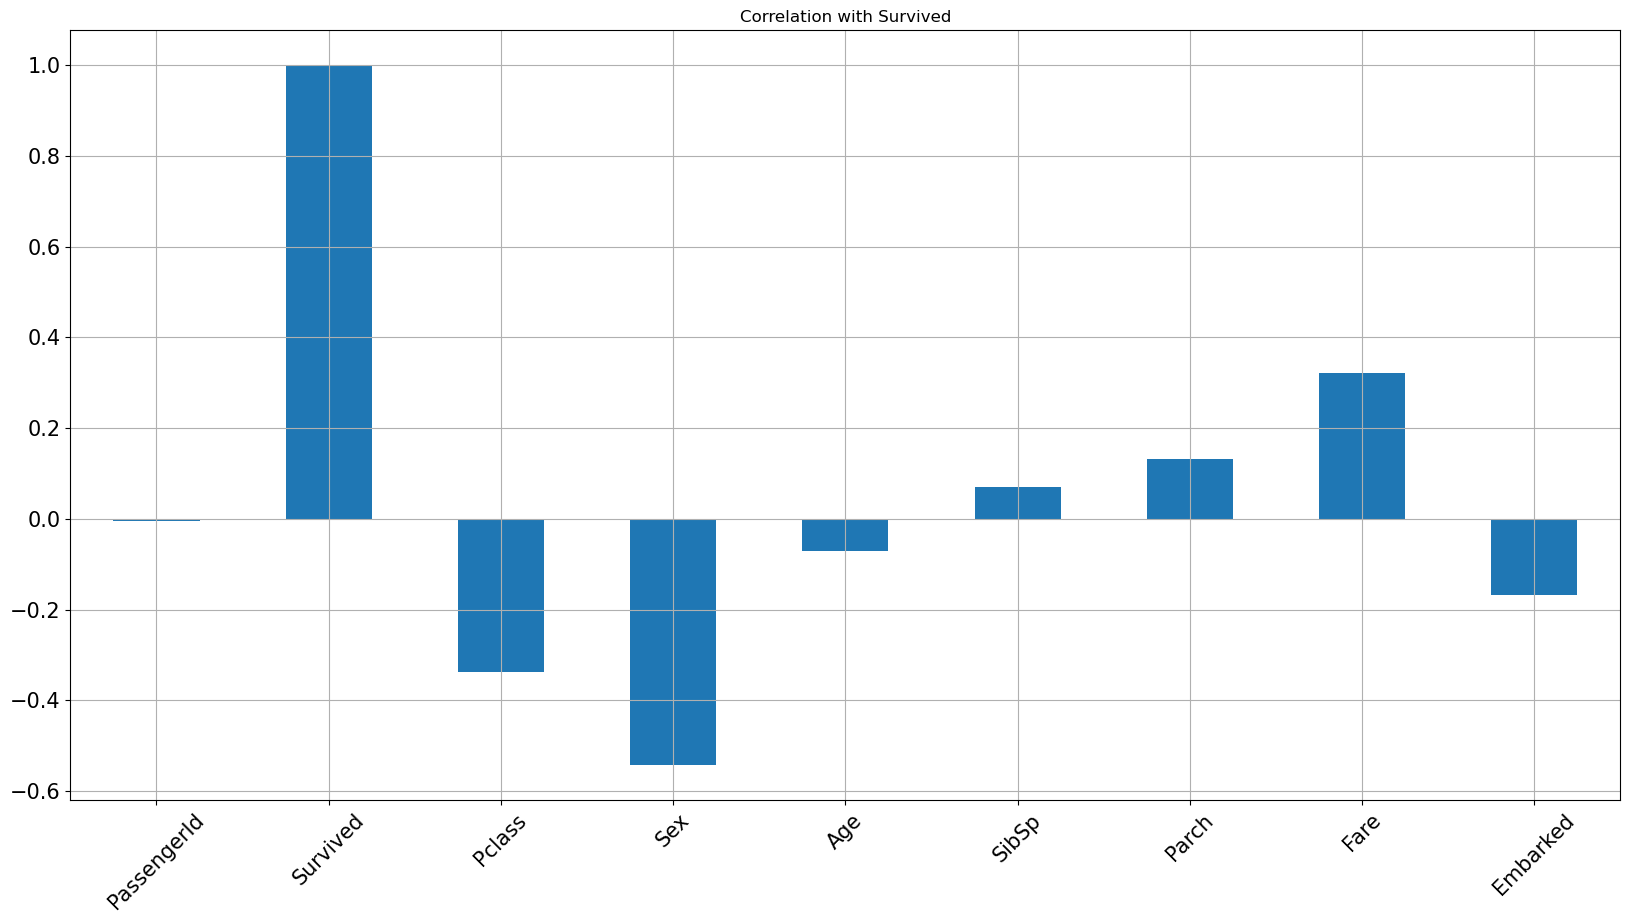

In [42]:
#Correlation with Quality with respect to attributes
data.corrwith(data.Survived).plot.bar(
        figsize = (20, 10), title = "Correlation with Survived", fontsize = 15,
        rot = 45, grid = True)

In [ ]:
#As Passenger Id does not seem to have any impact on label "Survived",we can drop it.

In [43]:
data.drop('PassengerId',axis=1, inplace=True)

In [44]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,1.935438,2
1,1,1,0,38.0,1.0,0.0,4.146318,0
2,1,3,0,26.0,0.0,0.0,1.993730,2
3,1,1,0,35.0,1.0,0.0,3.758647,2
4,0,3,1,35.0,0.0,0.0,2.004158,2


In [45]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
#Separating features and label
X=data.drop(columns=['Survived'])
y=data['Survived']


In [62]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [63]:
scaler=StandardScaler()

In [64]:
X_scaled=scaler.fit_transform(X)

In [65]:
X_scaled

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.5516538 ,
        -0.77470751,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.5516538 ,
         1.28790269, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.5516538 ,
        -0.72032473,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  1.99975084,
         0.08999021,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.5516538 ,
         0.31850202, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.5516538 ,
        -0.73411779, -0.67817453]])

In [67]:
#Splitting data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.25,random_state=10)

In [68]:
X_test

array([[ 0.82737724,  0.73769513,  0.40792596, ..., -0.5516538 ,
        -0.78514497,  0.58595414],
       [ 0.82737724,  0.73769513, -0.7463893 , ..., -0.5516538 ,
        -0.79146616,  0.58595414],
       [ 0.82737724,  0.73769513, -0.2846632 , ..., -0.5516538 ,
        -0.72261199,  0.58595414],
       ...,
       [-0.36936484, -1.35557354, -0.97725235, ..., -0.5516538 ,
        -0.53744194,  0.58595414],
       [-0.36936484,  0.73769513, -0.20770885, ..., -0.5516538 ,
        -0.38670262,  0.58595414],
       [-1.56610693, -1.35557354,  0.25401726, ..., -0.5516538 ,
         1.54560287,  0.58595414]])

In [72]:
#Checking if data is balanced
y_train.value_counts()

0    402
1    266
Name: Survived, dtype: int64

In [73]:
#Model building using Support Vector Machine
from sklearn.svm import SVC

In [130]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_train)
acc_svc = round(accuracy_score(y_train,y_pred)*100,2)
print("Training score:", acc_svc)
pred=svc.predict(X_test)
acc_svc1= round(accuracy_score(y_test,pred)*100,2)
print("Test score:",acc_svc1)


           
        
  

       

Training score: 83.68
Test score: 84.3


In [131]:
print('\n\n Test Classification Report\n', classification_report(y_test,pred))



 Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       147
           1       0.83      0.68      0.75        76

    accuracy                           0.84       223
   macro avg       0.84      0.80      0.82       223
weighted avg       0.84      0.84      0.84       223



In [111]:
#Model building using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [132]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_train)
acc_log=round(accuracy_score(y_train,y_pred)*100,2)
print("Training score:",acc_log)
pred1=log_reg.predict(X_test)
acc_log1=round(accuracy_score(y_test,pred1)*100,2)
print("Test score:",acc_log1)
print('\n\n Test Classification Report\n', classification_report(y_test,pred1))


Training score: 78.29
Test score: 83.86


 Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       147
           1       0.79      0.71      0.75        76

    accuracy                           0.84       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



In [100]:
#Model building using using Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [133]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_train)
acc_dt=round(accuracy_score(y_train,y_pred)*100,2)
print("Training score:",acc_dt)
pred2=dt.predict(X_test)
acc_dt1=round(accuracy_score(y_test,pred2)*100,2)
print("Test score:",acc_dt1)
print('\n\n Test Classification Report\n', classification_report(y_test,pred2))

Training score: 98.5
Test score: 80.27


 Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       147
           1       0.71      0.71      0.71        76

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [103]:
#Model building using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_train)
acc_rfc=round(accuracy_score(y_train,y_pred)*100,2)
print("Training score:",acc_rfc)
pred3=rfc.predict(X_test)
acc_rfc1=round(accuracy_score(y_test,pred3)*100,2)
print("Test score:",acc_rfc1)
print('\n\n Test Classification Report\n', classification_report(y_test,pred3))

Training score: 98.5
Test score: 83.41


 Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       147
           1       0.77      0.72      0.75        76

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



In [106]:
#Model building using Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [136]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=rfc.predict(X_train)
acc_gbc=round(accuracy_score(y_train,y_pred)*100,2)
print("Training score:",acc_gbc)
pred4=gbc.predict(X_test)
acc_gbc1=round(accuracy_score(y_test,pred4)*100,2)
print("Test score:",acc_gbc1)
print('\n\n Test Classification Report\n', classification_report(y_test,pred4))


Training score: 98.5
Test score: 85.2


 Test Classification Report
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       147
           1       0.84      0.70      0.76        76

    accuracy                           0.85       223
   macro avg       0.85      0.81      0.83       223
weighted avg       0.85      0.85      0.85       223



In [137]:
#Let's compare model results
model = pd.DataFrame({
    'Model': ['Support Vector Machine', 'Logistic Regression', 
              'Random Forest', 'Decision Tree', 'Gradient Boosting Classifier'],

    
    'Score':  [acc_svc1, acc_log1,acc_rfc1,acc_dt1,acc_gbc1]})


In [138]:
model

,Model,Score
0,Support Vector Machine,84.30
1,Logistic Regression,83.86
2,Random Forest,83.41
3,Decision Tree,80.27
4,Gradient Boosting Classifier,85.20


In [ ]:
#We can conclude that SVC is giving the best results.
#Also, the difference between train and test score is the lowest in SVC(Gradient Boosting has highest score however,
#difference between training and test score is more for this model).